In [252]:
import numpy as np
import pandas as pd
import os
import sys
sys.argv.append('-Xfrozen_modules=off')
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'

In [253]:
file = "sample/survey_results_public.csv"
df = pd.read_csv(file)
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [254]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [255]:
new_df = df.drop(columns=['Q120','SurveyLength','SurveyEase'])
new_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkW

In [256]:
null_df = new_df.loc[:, ((new_df.isnull().sum() / new_df.shape[0]) * 100) >= 70]

In [257]:
null_df.isnull().sum() / new_df.shape[0] * 100

AIDevHaveWorkedWith                    70.954431
AIDevWantToWorkWith                    78.037540
AIToolNot interested in Using          76.375807
AINextVery different                   85.803507
AINextNeither different nor similar    92.600691
AINextSomewhat similar                 93.005472
AINextVery similar                     97.061132
AINextSomewhat different               73.870874
dtype: float64

In [258]:
work_df = new_df.drop(columns=null_df.columns)
work_df.shape[1]

73

In [259]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      89184 non-null  int64  
 1   MainBranch                      89184 non-null  object 
 2   Age                             89184 non-null  object 
 3   Employment                      87898 non-null  object 
 4   RemoteWork                      73810 non-null  object 
 5   CodingActivities                73764 non-null  object 
 6   EdLevel                         87973 non-null  object 
 7   LearnCode                       87663 non-null  object 
 8   LearnCodeOnline                 70084 non-null  object 
 9   LearnCodeCoursesCert            37076 non-null  object 
 10  YearsCode                       87435 non-null  object 
 11  YearsCodePro                    66136 non-null  object 
 12  DevType                         

In [260]:
for x in work_df.columns[1:]:
    print(f"Unique values in {x}:\n {work_df[x].unique()}\n\n")

Unique values in MainBranch:
 ['None of these' 'I am a developer by profession'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I code primarily as a hobby' 'I am learning to code'
 'I used to be a developer by profession, but no longer am']


Unique values in Age:
 ['18-24 years old' '25-34 years old' '45-54 years old' '35-44 years old'
 'Under 18 years old' '55-64 years old' '65 years or older'
 'Prefer not to say']


Unique values in Employment:
 [nan 'Employed, full-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Student, full-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time'
 'Not employed, but looking for work;Student, full-time'
 'Employed, part-time;Student, part-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time' 'I prefer not to say'
 'Em

In [261]:
work_df['Industry'].unique()

array([nan,
       'Information Services, IT, Software Development, or other Technology',
       'Other', 'Financial Services',
       'Manufacturing, Transportation, or Supply Chain',
       'Retail and Consumer Services', 'Higher Education',
       'Legal Services', 'Insurance', 'Healthcare', 'Oil & Gas',
       'Wholesale', 'Advertising Services'], dtype=object)

In [262]:
count = 0
for x in work_df.columns[1:]:
    count += ((work_df[x].isnull().sum() / work_df.shape[0]) * 100)

average_percentage_null = count / (work_df.shape[1])
print(f"Average null value percentage in data : {average_percentage_null}")

Average null value percentage in data : 29.41821679421581


In [263]:
mp = {}
for x in work_df.columns:
    mp[x] = (work_df[x].isnull().sum() / work_df.shape[0]) * 100
mp

{'ResponseId': 0.0,
 'MainBranch': 0.0,
 'Age': 0.0,
 'Employment': 1.441962683889487,
 'RemoteWork': 17.238518119842126,
 'CodingActivities': 17.29009687836383,
 'EdLevel': 1.3578668819519195,
 'LearnCode': 1.7054628632938644,
 'LearnCodeOnline': 21.416397560100467,
 'LearnCodeCoursesCert': 58.427520631503405,
 'YearsCode': 1.961114101184069,
 'YearsCodePro': 25.843200574094006,
 'DevType': 13.805166846071042,
 'OrgSize': 27.068756727664155,
 'PurchaseInfluence': 27.157337639038392,
 'TechList': 31.769151417294584,
 'BuyNewTool': 6.923887692859705,
 'Country': 1.3578668819519195,
 'Currency': 26.742465016146394,
 'CompTotal': 45.926399354144245,
 'LanguageHaveWorkedWith': 2.2918909221385,
 'LanguageWantToWorkWith': 9.502825618945101,
 'DatabaseHaveWorkedWith': 17.65899712952996,
 'DatabaseWantToWorkWith': 31.701874775744525,
 'PlatformHaveWorkedWith': 28.655364190886257,
 'PlatformWantToWorkWith': 42.46950125583064,
 'WebframeHaveWorkedWith': 24.94393613204162,
 'WebframeWantToWorkWit

In [264]:
print(f"Different columns in data\n {work_df.columns}\n\n")

Different columns in data
 Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',


In [265]:
print(f"Each column null values\n")
for x in work_df.columns:
    print(f"{x} : {mp[x]}\n")

Each column null values

ResponseId : 0.0

MainBranch : 0.0

Age : 0.0

Employment : 1.441962683889487

RemoteWork : 17.238518119842126

CodingActivities : 17.29009687836383

EdLevel : 1.3578668819519195

LearnCode : 1.7054628632938644

LearnCodeOnline : 21.416397560100467

LearnCodeCoursesCert : 58.427520631503405

YearsCode : 1.961114101184069

YearsCodePro : 25.843200574094006

DevType : 13.805166846071042

OrgSize : 27.068756727664155

PurchaseInfluence : 27.157337639038392

TechList : 31.769151417294584

BuyNewTool : 6.923887692859705

Country : 1.3578668819519195

Currency : 26.742465016146394

CompTotal : 45.926399354144245

LanguageHaveWorkedWith : 2.2918909221385

LanguageWantToWorkWith : 9.502825618945101

DatabaseHaveWorkedWith : 17.65899712952996

DatabaseWantToWorkWith : 31.701874775744525

PlatformHaveWorkedWith : 28.655364190886257

PlatformWantToWorkWith : 42.46950125583064

WebframeHaveWorkedWith : 24.94393613204162

WebframeWantToWorkWith : 36.37760136347327

MiscTech

In [266]:
print(f"Average null value percentage in data \n {average_percentage_null}")

Average null value percentage in data 
 29.41821679421581


In [267]:
print(f"Data Info\n {work_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      89184 non-null  int64  
 1   MainBranch                      89184 non-null  object 
 2   Age                             89184 non-null  object 
 3   Employment                      87898 non-null  object 
 4   RemoteWork                      73810 non-null  object 
 5   CodingActivities                73764 non-null  object 
 6   EdLevel                         87973 non-null  object 
 7   LearnCode                       87663 non-null  object 
 8   LearnCodeOnline                 70084 non-null  object 
 9   LearnCodeCoursesCert            37076 non-null  object 
 10  YearsCode                       87435 non-null  object 
 11  YearsCodePro                    66136 non-null  object 
 12  DevType                         

In [268]:
most_null_df = work_df.loc[:, (work_df.isnull().sum()/work_df.shape[0])*100 >= 45]
most_null_df.isnull().sum()

LearnCodeCoursesCert         52108
CompTotal                    40959
MiscTechWantToWorkWith       42336
AISearchWantToWorkWith       43034
SOAI                         41326
AIAcc                        50590
AIToolInterested in Using    56401
AIToolCurrently Using        53047
ICorPM                       45516
WorkExp                      45605
Knowledge_1                  46649
Knowledge_2                  47514
Knowledge_3                  47386
Knowledge_4                  47500
Knowledge_5                  47657
Knowledge_6                  47664
Knowledge_7                  47717
Knowledge_8                  47780
Frequency_1                  47268
Frequency_2                  47259
Frequency_3                  48130
TimeSearching                46406
TimeAnswering                46555
ProfessionalTech             47401
Industry                     52410
ConvertedCompYearly          41165
dtype: int64

In [269]:
work_df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [270]:
column_mapping = {
    'Knowledge_1': 'Interactions_Outside_Team',
    'Knowledge_2': 'Knowledge_Silos',
    'Knowledge_3': 'UpToDate_Information',
    'Knowledge_4': 'Quick_Access_Answers',
    'Knowledge_5': 'Resource_Awareness',
    'Knowledge_6': 'Repetitive_Answers',
    'Knowledge_7': 'Interruptions_Workflow',
    'Knowledge_8': 'Tool_Resource_Availability'
}

new_work_df = work_df.drop(columns=[x for x in column_mapping])
new_work_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkW

In [271]:
for x in column_mapping:
    print(f"{x}:{work_df[x].unique()}\n")

Knowledge_1:[nan 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree'
 'Neither agree nor disagree']

Knowledge_2:[nan 'Agree' 'Neither agree nor disagree' 'Strongly disagree'
 'Strongly agree' 'Disagree']

Knowledge_3:[nan 'Strongly agree' 'Agree' 'Disagree' 'Neither agree nor disagree'
 'Strongly disagree']

Knowledge_4:[nan 'Agree' 'Strongly agree' 'Neither agree nor disagree' 'Disagree'
 'Strongly disagree']

Knowledge_5:[nan 'Agree' 'Neither agree nor disagree' 'Strongly disagree' 'Disagree'
 'Strongly agree']

Knowledge_6:[nan 'Agree' 'Neither agree nor disagree' 'Disagree' 'Strongly agree'
 'Strongly disagree']

Knowledge_7:[nan 'Agree' 'Strongly agree' 'Disagree' 'Neither agree nor disagree'
 'Strongly disagree']

Knowledge_8:[nan 'Strongly agree' 'Agree' 'Disagree' 'Neither agree nor disagree'
 'Strongly disagree']



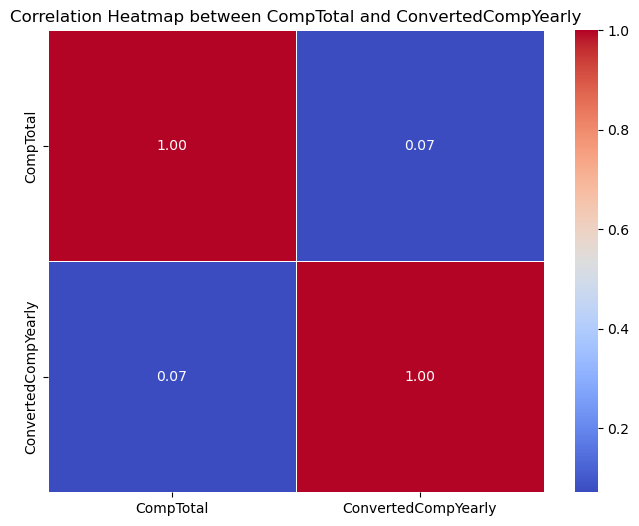

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Select only the relevant columns
relevant_columns = ['CompTotal', 'ConvertedCompYearly']
correlation_matrix = new_work_df[relevant_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between CompTotal and ConvertedCompYearly')
plt.show()

In [273]:
new_work_df[relevant_columns].isnull().sum()/new_work_df.shape[0]

CompTotal              0.459264
ConvertedCompYearly    0.461574
dtype: float64

In [274]:
"new_work_df.to_csv('sample/work.csv', index=False)"

"new_work_df.to_csv('sample/work.csv', index=False)"

In [275]:
new_work_df.head(20)

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,ICorPM,WorkExp,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,People manager,10.0,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,Individual contributor,23.0,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,Individual contributor,7.0,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,156000.0
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,...,Individual contributor,6.0,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,23456.0
5,6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,...,Individual contributor,22.0,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,96828.0
6,7,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,NaN,Udemy,...,Individual contributor,4.0,1-2 times a week,3-5 times a week,1-2 times a week,Less than 15 minutes a day,15-30 minutes a day,Microservices;Automated testing;Continuous int...,"Information Services, IT, Software Development...",135000.0
7,8,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Codecademy;edX,...,NaN,5.0,NaN,NaN,NaN,60-120 minutes a day,30-60 minutes a day,None of these,Financial Services,80000.0
8,9,"I am not primarily a developer, but I write co...",45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of .

In [276]:
numeric_columns  = new_work_df.select_dtypes(include=['int', 'float']).columns
numeric_columns

Index(['ResponseId', 'CompTotal', 'WorkExp', 'ConvertedCompYearly'], dtype='object')

In [277]:
new_work_df['Employment'].unique()

array([nan, 'Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time',
       'Not employed, but looking for work;Student, full-time',
       'Employed, part-time;Student, part-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time', 'I prefer not to say',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Not employed, but looking for work;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Retired', 'Employed, full-time;Student, full-time',
       'Student, full-time;Student, part-time',
       '

In [278]:
n_work_df = new_work_df.dropna(subset=['Employment'])

In [279]:
n_work_df[n_work_df['Employment'].str.contains('Not employed', case=False)]

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,ICorPM,WorkExp,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly
9,10,I am a developer by profession,25-34 years old,"Not employed, but looking for work",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,edX;Udemy;Pluralsight;Coursera;Udacity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,59,"I am not primarily a developer, but I write co...",18-24 years old,"Not employed, but looking for work;Student, fu...",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,68,I am a developer by profession,35-44 years old,"Not employed, but looking for work",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,70,I am a developer by profession,25-34 years old,"Not employed, but looking for work",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,106,I am learning to code,18-24 years old,"Not employed, but looking for work;Employed, p...","Hybrid (some remote, some in-person)",I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of ...,Udemy;Pluralsight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89060,89061,I code primarily as a hobby,Under 18 years old,"Student, full-time;Not employed, and not looki...",NaN,NaN,Primary/elementary school,Friend or family member;Other online resources...,Formal documentation provided by the owner of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89065,89066,I code primarily as a hobby,Under 18 years old,"Not employed, and not looking for work",NaN,NaN,Primary/elementary school,Books / Physical media;Colleague;Online Course...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89096,89097,I am learning to code,Under 18 years old,"Not employed, and not looking for work",NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Recorded coding sessions;How-to videos;Click t...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89149,89150,I am learning to code,25-34 years old,"Not employed, but looking for work;Student, pa...",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Friend or family member...,Blogs with tips and tricks;Books;Recorded codi...,Codecademy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
n_work_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkW

In [281]:
n_work_df.isnull().sum()/n_work_df.shape[0]

ResponseId             0.000000
MainBranch             0.000000
Age                    0.000000
Employment             0.000000
RemoteWork             0.160277
                         ...   
TimeSearching          0.513425
TimeAnswering          0.515120
ProfessionalTech       0.524733
Industry               0.581708
ConvertedCompYearly    0.453833
Length: 65, dtype: float64

In [282]:
n_work_df[['CompTotal', 'Currency', 'ConvertedCompYearly']]

,CompTotal,Currency,ConvertedCompYearly
1,2.850000e+05,USD\tUnited States dollar,285000.0
2,2.500000e+05,USD\tUnited States dollar,250000.0
3,1.560000e+05,USD\tUnited States dollar,156000.0
4,1.320000e+06,PHP\tPhilippine peso,23456.0
5,7.800000e+04,GBP\tPound sterling,96828.0
...,...,...,...
89179,2.000000e+05,BRL\tBrazilian real,NaN
89180,NaN,NaN,NaN
89181,NaN,NaN,NaN
89182,NaN,NaN,NaN


In [283]:
n_work_df['Currency'].unique()

array(['USD\tUnited States dollar', 'PHP\tPhilippine peso',
       'GBP\tPound sterling', 'EUR European Euro', nan,
       'AUD\tAustralian dollar', 'SEK\tSwedish krona',
       'AMD\tArmenian dram', 'ZAR\tSouth African rand',
       'BRL\tBrazilian real', 'BDT\tBangladeshi taka',
       'CAD\tCanadian dollar', 'CHF\tSwiss franc',
       'LKR\tSri Lankan rupee', 'INR\tIndian rupee', 'IRR\tIranian rial',
       'PLN\tPolish zloty', 'RUB\tRussian ruble', 'TRY\tTurkish lira',
       'DKK\tDanish krone', 'ILS\tIsraeli new shekel',
       'HUF\tHungarian forint', 'SGD\tSingapore dollar',
       'AED United Arab Emirates dirham', 'NOK\tNorwegian krone',
       'RSD\tSerbian dinar', 'CZK\tCzech koruna', 'NPR\tNepalese rupee',
       'RON\tRomanian leu', 'CNY\tChinese Yuan Renminbi',
       'SAR\tSaudi Arabian riyal', 'TND\tTunisian dinar',
       'KRW\tSouth Korean won', 'VND\tVietnamese dong',
       'UAH\tUkrainian hryvnia', 'DOP\tDominican peso',
       'EGP\tEgyptian pound', 'UZS\tUzbekis

In [284]:
from forex_python.converter import CurrencyRates

In [285]:
null_currency_rows = n_work_df[new_work_df['Currency'].isnull()]
(null_currency_rows[['CompTotal', 'Currency', 'ConvertedCompYearly']].isnull().sum()/null_currency_rows.shape[0])*100

/tmp/ipykernel_21213/3030465465.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  null_currency_rows = n_work_df[new_work_df['Currency'].isnull()]


CompTotal              100.0
Currency               100.0
ConvertedCompYearly    100.0
dtype: float64

In [286]:
one_df = n_work_df

In [287]:
one_df = one_df.dropna(subset=['Currency'])

In [288]:
one_df['Currency'].isnull().sum()/one_df.shape[0]

0.0

In [289]:
one_df['Currency'] = one_df['Currency'].apply(lambda x: x.split('\t')[0])
one_df['Currency']

/tmp/ipykernel_21213/3603474730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['Currency'] = one_df['Currency'].apply(lambda x: x.split('\t')[0])


1        USD
2        USD
3        USD
4        PHP
5        GBP
        ... 
89175    USD
89177    MXN
89178    USD
89179    BRL
89183    IRR
Name: Currency, Length: 65298, dtype: object

In [290]:
c = CurrencyRates()
currency_rates = {}

def get_conversion_rate(from_currency, to_currency='USD'):
    global currency_rates

    if (from_currency, to_currency) not in currency_rates:
        try:
            rate = c.get_rate(from_currency, to_currency)
            currency_rates[(from_currency, to_currency)] = rate
        except Exception as e:
            print(f"Error: {e}")
            currency_rates[(from_currency, to_currency)] = 1.0 
    return currency_rates.get((from_currency, to_currency))

# Vectorized conversion
one_df['ConvertedCompYearly'] = one_df.apply(
    lambda row: row['CompTotal'] * get_conversion_rate(row['Currency'])
    if pd.isna(row['ConvertedCompYearly']) and not pd.isna(row['CompTotal']) and not pd.isna(row['Currency'])
    else row['ConvertedCompYearly'],
    axis=1
)

Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Source Not Ready
Error: Currency Rates Sou

/tmp/ipykernel_21213/698320844.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_df['ConvertedCompYearly'] = one_df.apply(


In [291]:
one_df[['CompTotal', 'Currency', 'ConvertedCompYearly']]

,CompTotal,Currency,ConvertedCompYearly
1,2.850000e+05,USD,2.850000e+05
2,2.500000e+05,USD,2.500000e+05
3,1.560000e+05,USD,1.560000e+05
4,1.320000e+06,PHP,2.345600e+04
5,7.800000e+04,GBP,9.682800e+04
...,...,...,...
89175,1.350000e+05,USD,1.350000e+05
89177,1.000000e+06,MXN,1.000000e+06
89178,2.120210e+05,USD,2.120210e+05
89179,2.000000e+05,BRL,2.000000e+05


In [292]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65298 entries, 1 to 89183
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      65298 non-null  int64  
 1   MainBranch                      65298 non-null  object 
 2   Age                             65298 non-null  object 
 3   Employment                      65298 non-null  object 
 4   RemoteWork                      64922 non-null  object 
 5   CodingActivities                64868 non-null  object 
 6   EdLevel                         65298 non-null  object 
 7   LearnCode                       65057 non-null  object 
 8   LearnCodeOnline                 51453 non-null  object 
 9   LearnCodeCoursesCert            28105 non-null  object 
 10  YearsCode                       64947 non-null  object 
 11  YearsCodePro                    64607 non-null  object 
 12  DevType                         64713

In [293]:
one_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkW

In [294]:
one_df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'I prefer not to say', 'Employed, full-time;Employed, part-time',
       'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Retired',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [295]:
(one_df['ConvertedCompYearly'].isnull().sum()/one_df.shape[0])*100

26.164660479647157

In [296]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65298 entries, 1 to 89183
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      65298 non-null  int64  
 1   MainBranch                      65298 non-null  object 
 2   Age                             65298 non-null  object 
 3   Employment                      65298 non-null  object 
 4   RemoteWork                      64922 non-null  object 
 5   CodingActivities                64868 non-null  object 
 6   EdLevel                         65298 non-null  object 
 7   LearnCode                       65057 non-null  object 
 8   LearnCodeOnline                 51453 non-null  object 
 9   LearnCodeCoursesCert            28105 non-null  object 
 10  YearsCode                       64947 non-null  object 
 11  YearsCodePro                    64607 non-null  object 
 12  DevType                         64713

In [297]:
n_one_df = one_df.drop(columns=['Frequency_1','Frequency_2', 'Frequency_3'])

In [298]:
non_binary_categorical_columns = n_one_df.select_dtypes(exclude='number').columns
non_binary_categorical_columns

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities',
       'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence',
       'TechList', 'BuyNewTool', 'Country', 'Currency',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'NEWSOSites',
       'SOVisi

In [299]:
(n_one_df['ConvertedCompYearly'].isnull().sum()/one_df.shape[0])*100

26.164660479647157

In [300]:
median_compensation_employed = n_one_df['ConvertedCompYearly'].median()
temp_df = n_one_df

In [301]:
temp_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkW

In [302]:
temp_df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'I prefer not to say', 'Employed, full-time;Employed, part-time',
       'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Retired',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [303]:
temp_df.drop(columns=['TimeSearching',	'TimeAnswering'], inplace=True)
temp_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWantToWorkW

In [304]:
temp_df['ConvertedCompYearly'].fillna(median_compensation_employed, inplace=True)

/tmp/ipykernel_21213/1112849022.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['ConvertedCompYearly'].fillna(median_compensation_employed, inplace=True)


In [305]:
(temp_df['ConvertedCompYearly'].isnull().sum()/one_df.shape[0])*100

0.0

In [306]:
categorical_columns = temp_df.select_dtypes(exclude='number').columns

In [307]:
frequency_mappings = {}

# Iterate over each categorical column
for column in categorical_columns:
    # Calculate the frequency of each category
    frequency = temp_df[column].value_counts(normalize=True)
    # Map the category frequencies to the categories
    frequency_mappings[column] = frequency.to_dict()

# Map the frequencies to the DataFrame to perform encoding
for column in categorical_columns:
    temp_df[column + '_freq_encoded'] = temp_df[column].map(frequency_mappings[column])


In [308]:
dummy_df = temp_df.iloc[:, 60:]

In [309]:
temp_df.iloc[:, 59]

1        2.850000e+05
2        2.500000e+05
3        1.560000e+05
4        2.345600e+04
5        9.682800e+04
             ...     
89175    1.350000e+05
89177    1.000000e+06
89178    2.120210e+05
89179    2.000000e+05
89183    3.300000e+09
Name: ConvertedCompYearly, Length: 65298, dtype: float64

In [310]:
dummy_df['ConvertedCompYearly'] = temp_df['ConvertedCompYearly']
dummy_df

,MainBranch_freq_encoded,Age_freq_encoded,Employment_freq_encoded,RemoteWork_freq_encoded,CodingActivities_freq_encoded,EdLevel_freq_encoded,LearnCode_freq_encoded,LearnCodeOnline_freq_encoded,LearnCodeCoursesCert_freq_encoded,YearsCode_freq_encoded,...,AISent_freq_encoded,AIAcc_freq_encoded,AIBen_freq_encoded,AIToolInterested in Using_freq_encoded,AIToolCurrently Using_freq_encoded,TBranch_freq_encoded,ICorPM_freq_encoded,ProfessionalTech_freq_encoded,Industry_freq_encoded,ConvertedCompYearly
1,0.911896,0.438084,0.793792,0.425203,0.007770,0.462219,0.002813,0.000311,0.073617,0.024174,...,0.169087,0.012128,0.223154,0.004081,0.004504,0.670097,0.132334,0.003112,0.495264,2.850000e+05
2,0.911896,0.111964,0.793792,0.422353,0.119751,0.462219,0.012174,0.001224,NaN,0.010008,...,NaN,NaN,NaN,NaN,NaN,0.670097,0.867666,0.025404,0.495264,2.500000e+05
3,0.911896,0.438084,0.793792,0.422353,0.219954,0.462219,0.000676,0.000058,NaN,0.046653,...,NaN,NaN,NaN,NaN,NaN,0.670097,0.867666,0.033107,NaN,1.560000e+05
4,0.911896,0.438084,0.064948,0.425203,0.046371,0.462219,0.020613,0.000039,0.000640,0.046345,...,0.274551,0.126870,0.377738,0.006272,0.019739,0.670097,0.867666,0.012447,0.108485,2.345600e+04
5,0.911896,0.281862,0.793792,0.425203,0.119751,0.115440,0.007701,0.000622,0.073617,0.010809,...,0.483900,0.024587,0.377738,0.004597,0.102338,0.670097,0.867666,0.010687,0.108485,9.682800e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89175,0.911896,0.438084,0.793792,0.425203,0.130157,0.462219,0.001522,0.000136,0.002206,0.081343,...,0.483900,0.169723,0.377738,0.003909,0.030588,0.670097,0.867666,0.021068,0.495264,1.350000e+05
89177,0.911896,0.281862,0.793792,0.425203,0.005226,0.274388,0.027145,0.000719,NaN,0.021926,...,0.169087,NaN,0.317644,NaN,NaN,0.670097,0.867666,0.003137,0.121028,1.000000e+06
89178,0.911896,0.111964,0.793792,0.425203,0.219954,0.462219,0.028867,0.000078,0.000285,0.037708,...,0.483900,NaN,0.223154,NaN,NaN,0.670097,0.867666,0.025404,0.019553,2.120210e+05
89179,0.911896,0.438084,0.064948,0.425203,0.008926,0.031532,0.027975,0.000019,0.207757,0.056292,...,0.274551,0.126870,0.377738,0.004768,0.039400,0.329903,NaN,NaN,NaN,2.000000e+05


In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = dummy_df.corr()

plt.figure(figsize=(120, 100))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [312]:
arr = {}
for x in dummy_df.columns:
    arr[x] = (dummy_df[x].isnull().sum()/dummy_df.shape[0])*100
arr

{'MainBranch_freq_encoded': 0.0,
 'Age_freq_encoded': 0.0,
 'Employment_freq_encoded': 0.0,
 'RemoteWork_freq_encoded': 0.5758216178137157,
 'CodingActivities_freq_encoded': 0.6585194033507917,
 'EdLevel_freq_encoded': 0.0,
 'LearnCode_freq_encoded': 0.36907715397102514,
 'LearnCodeOnline_freq_encoded': 21.202793347422585,
 'LearnCodeCoursesCert_freq_encoded': 56.958865508897674,
 'YearsCode_freq_encoded': 0.5375356059909951,
 'YearsCodePro_freq_encoded': 1.0582253667799932,
 'DevType_freq_encoded': 0.8958926766516585,
 'OrgSize_freq_encoded': 0.4318662133602867,
 'PurchaseInfluence_freq_encoded': 0.5528500107200833,
 'TechList_freq_encoded': 36.27063616037244,
 'BuyNewTool_freq_encoded': 4.7244938589237035,
 'Country_freq_encoded': 0.0,
 'Currency_freq_encoded': 0.0,
 'LanguageHaveWorkedWith_freq_encoded': 0.5237526417348158,
 'LanguageWantToWorkWith_freq_encoded': 8.257527029924347,
 'DatabaseHaveWorkedWith_freq_encoded': 13.452173114031057,
 'DatabaseWantToWorkWith_freq_encoded': 27

In [313]:
(dummy_df.isnull().sum()/dummy_df.shape[0])*100

MainBranch_freq_encoded                         0.000000
Age_freq_encoded                                0.000000
Employment_freq_encoded                         0.000000
RemoteWork_freq_encoded                         0.575822
CodingActivities_freq_encoded                   0.658519
EdLevel_freq_encoded                            0.000000
LearnCode_freq_encoded                          0.369077
LearnCodeOnline_freq_encoded                   21.202793
LearnCodeCoursesCert_freq_encoded              56.958866
YearsCode_freq_encoded                          0.537536
YearsCodePro_freq_encoded                       1.058225
DevType_freq_encoded                            0.895893
OrgSize_freq_encoded                            0.431866
PurchaseInfluence_freq_encoded                  0.552850
TechList_freq_encoded                          36.270636
BuyNewTool_freq_encoded                         4.724494
Country_freq_encoded                            0.000000
Currency_freq_encoded          

In [314]:
null_percentages_df = pd.DataFrame.from_dict(arr, orient='index', columns=['NullPercentage'])
low = 1
high = 20
null_percentages_df

,NullPercentage
MainBranch_freq_encoded,0.000000
Age_freq_encoded,0.000000
Employment_freq_encoded,0.000000
RemoteWork_freq_encoded,0.575822
CodingActivities_freq_encoded,0.658519
EdLevel_freq_encoded,0.000000
LearnCode_freq_encoded,0.369077
LearnCodeOnline_freq_encoded,21.202793
LearnCodeCoursesCert_freq_encoded,56.958866
YearsCode_freq_encoded,0.537536


In [315]:
# null_percentages_df.columns

In [316]:
# column = [x for x in null_percentages_df.iloc[:, :]]
# column

In [317]:
# null_percentages_df.loc['Industry_freq_encoded', 'NullPercentage']

In [323]:
for column, arr in null_percentages_df.iterrows():
    if column != 'ConvertedCompYearly':
        if null_percentages_df.loc[column, 'NullPercentage'] <= low:
            dummy_df = dummy_df.dropna(subset=[column])
        elif low < null_percentages_df.loc[column, 'NullPercentage']<=high:
            dummy_df[column].fillna(dummy_df[column].mean(), inplace=True)

dummy_df

/tmp/ipykernel_21213/4176598138.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dummy_df[column].fillna(dummy_df[column].mean(), inplace=True)
/tmp/ipykernel_21213/4176598138.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,MainBranch_freq_encoded,Age_freq_encoded,Employment_freq_encoded,RemoteWork_freq_encoded,CodingActivities_freq_encoded,EdLevel_freq_encoded,LearnCode_freq_encoded,LearnCodeOnline_freq_encoded,LearnCodeCoursesCert_freq_encoded,YearsCode_freq_encoded,...,AISent_freq_encoded,AIAcc_freq_encoded,AIBen_freq_encoded,AIToolInterested in Using_freq_encoded,AIToolCurrently Using_freq_encoded,TBranch_freq_encoded,ICorPM_freq_encoded,ProfessionalTech_freq_encoded,Industry_freq_encoded,ConvertedCompYearly
1,0.911896,0.438084,0.793792,0.425203,0.007770,0.462219,0.002813,0.000311,0.073617,0.024174,...,0.169087,0.012128,0.223154,0.004081,0.004504,0.670097,0.132334,0.003112,0.495264,2.850000e+05
2,0.911896,0.111964,0.793792,0.422353,0.119751,0.462219,0.012174,0.001224,NaN,0.010008,...,NaN,NaN,NaN,NaN,NaN,0.670097,0.867666,0.025404,0.495264,2.500000e+05
3,0.911896,0.438084,0.793792,0.422353,0.219954,0.462219,0.000676,0.000058,NaN,0.046653,...,NaN,NaN,NaN,NaN,NaN,0.670097,0.867666,0.033107,NaN,1.560000e+05
4,0.911896,0.438084,0.064948,0.425203,0.046371,0.462219,0.020613,0.000039,0.000640,0.046345,...,0.274551,0.126870,0.377738,0.006272,0.019739,0.670097,0.867666,0.012447,0.108485,2.345600e+04
5,0.911896,0.281862,0.793792,0.425203,0.119751,0.115440,0.007701,0.000622,0.073617,0.010809,...,0.483900,0.024587,0.377738,0.004597,0.102338,0.670097,0.867666,0.010687,0.108485,9.682800e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89175,0.911896,0.438084,0.793792,0.425203,0.130157,0.462219,0.001522,0.000136,0.002206,0.081343,...,0.483900,0.169723,0.377738,0.003909,0.030588,0.670097,0.867666,0.021068,0.495264,1.350000e+05
89177,0.911896,0.281862,0.793792,0.425203,0.005226,0.274388,0.027145,0.000719,NaN,0.021926,...,0.169087,NaN,0.317644,NaN,NaN,0.670097,0.867666,0.003137,0.121028,1.000000e+06
89178,0.911896,0.111964,0.793792,0.425203,0.219954,0.462219,0.028867,0.000078,0.000285,0.037708,...,0.483900,NaN,0.223154,NaN,NaN,0.670097,0.867666,0.025404,0.019553,2.120210e+05
89179,0.911896,0.438084,0.064948,0.425203,0.008926,0.031532,0.027975,0.000019,0.207757,0.056292,...,0.274551,0.126870,0.377738,0.004768,0.039400,0.329903,NaN,NaN,NaN,2.000000e+05


In [324]:
(dummy_df.isnull().sum()/dummy_df.shape[0])*100

MainBranch_freq_encoded                         0.000000
Age_freq_encoded                                0.000000
Employment_freq_encoded                         0.000000
RemoteWork_freq_encoded                         0.000000
CodingActivities_freq_encoded                   0.000000
EdLevel_freq_encoded                            0.000000
LearnCode_freq_encoded                          0.000000
LearnCodeOnline_freq_encoded                   20.482744
LearnCodeCoursesCert_freq_encoded              56.545113
YearsCode_freq_encoded                          0.000000
YearsCodePro_freq_encoded                       0.000000
DevType_freq_encoded                            0.000000
OrgSize_freq_encoded                            0.000000
PurchaseInfluence_freq_encoded                  0.000000
TechList_freq_encoded                          35.830614
BuyNewTool_freq_encoded                         0.000000
Country_freq_encoded                            0.000000
Currency_freq_encoded          